In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('datasets/fec/P00000001-ALL.csv')
data.info()

/var/folders/nx/j3jrdkw97q1gxc0nkyjz0sg80000gn/T/ipykernel_1837/918531606.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('datasets/fec/P00000001-ALL.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [4]:
data[data["receipt_desc"].notna()][:2]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
41,C00410118,P20002978,"Bachmann, Michelle","MINNIS, RITA",MILPITAS,CA,950357610.0,NaN,NaN,-1500.0,20-JUN-11,Refund,NaN,NaN,SB28A,736166
264,C00410118,P20002978,"Bachmann, Michelle","BISHOP, GERARD",WESTHAMPTON BEACH,NY,119780366.0,NaN,NaN,-1700.0,28-JUN-11,Refund,NaN,NaN,SB28A,736166


In [5]:
data.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [6]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

data["cand_nm"].value_counts()

Obama, Barack                     593746
Paul, Ron                         143757
Romney, Mitt                      107229
Gingrich, Newt                     47679
Santorum, Rick                     46559
Cain, Herman                       20107
Perry, Rick                        13575
Bachmann, Michelle                 13140
Roemer, Charles E. 'Buddy' III      5920
Pawlenty, Timothy                   4555
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Name: cand_nm, dtype: int64

In [7]:
data["party"] = data["cand_nm"].map(parties)
data.party.value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [8]:
data = data[data["contb_receipt_amt"] > 0]

In [9]:
data["contbr_occupation"].value_counts()[:20]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
Name: contbr_occupat

In [10]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x) :
    return occ_mapping.get(x, x)

data["contbr_occupation"] = data["contbr_occupation"].map(get_occ)

emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    return emp_mapping.get(x, x)
    
data["contbr_employer"] = data["contbr_employer"].map(get_emp)

In [11]:
data["party"].value_counts()

Democrat      589127
Republican    402348
Name: party, dtype: int64

In [ ]:
len(data["contbr_occupation"].unique())

In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
100_000, 1_000_000, 10_000_000])
data["amt_bin"] = pd.cut(data["contb_receipt_amt"], bins=bins)

In [29]:
cand_names = ["Obama, Barack", "Romney, Mitt", "Paul, Ron"]
topcands = data[data["cand_nm"].isin(cand_names[:2])]
topcands = topcands.reset_index(drop=True)
print(topcands["cand_nm"].value_counts())
print(topcands["contbr_occupation"].value_counts())

Obama, Barack    589127
Romney, Mitt     105155
Name: cand_nm, dtype: int64
RETIRED                                  177473
NOT PROVIDED                              37292
ATTORNEY                                  30133
HOMEMAKER                                 19626
PHYSICIAN                                 17206
                                          ...  
WEB PRODUCTION MANAGER                        1
RELIEF AND DEVELOPMENT                        1
DIRECTOR OF INTERGOVERNMENTAL AFFAIRS         1
RETAIL JEWELER OWNER/PRESIDENT                1
OIL AND GAS PIPELINE                          1
Name: contbr_occupation, Length: 33601, dtype: int64


In [13]:
def get_top_amounts(df, group_keys, amount_key, n=10):
    grouped = df.groupby(group_keys)
    grouped_sum = grouped[amount_key].apply(lambda group: group.sum())
    def sort_amounts(group):
        return group.sort_values(amount_key, ascending=False).iloc[:n]

    grouped_sum = grouped_sum.reset_index()
    top_amounts = grouped_sum.groupby(group_keys[0], as_index=False).apply(sort_amounts)
    return top_amounts.reset_index(drop=True)

<AxesSubplot:xlabel='contb_receipt_amt', ylabel='contbr_employer'>

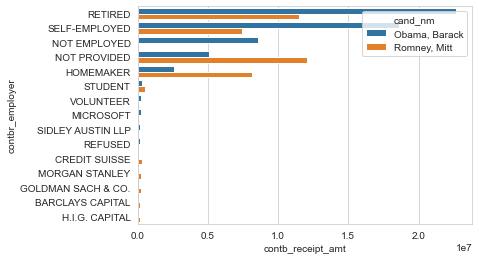

In [25]:
cand = "cand_nm"
occ = "contbr_occupation"
empl = "contbr_employer"
amt = "contb_receipt_amt"
party = "party"
top_amounts_cands = get_top_amounts(topcands, [cand, empl], amt)
import seaborn as sns
sns.barplot(x=amt, y=empl, hue=cand, data=top_amounts_cands)

In [26]:
top_amounts_cands

,cand_nm,contbr_employer,contb_receipt_amt
0,"Obama, Barack",RETIRED,22694358.85
1,"Obama, Barack",SELF-EMPLOYED,18626807.16
2,"Obama, Barack",NOT EMPLOYED,8586308.70
3,"Obama, Barack",NOT PROVIDED,5053480.37
4,"Obama, Barack",HOMEMAKER,2605408.54
5,"Obama, Barack",STUDENT,318831.45
6,"Obama, Barack",VOLUNTEER,257104.00
7,"Obama, Barack",MICROSOFT,215585.36
8,"Obama, Barack",SIDLEY AUSTIN LLP,168254.00
9,"Obama, Barack",REFUSED,149516.07


In [23]:
cand = "cand_nm"
occ = "contbr_occupation"
empl = "contbr_employer"
amt = "contb_receipt_amt"
party = "party"
top_amounts_party = get_top_amounts(data, [party, occ], amt, n=17)


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='contb_receipt_amt', ylabel='contbr_occupation'>

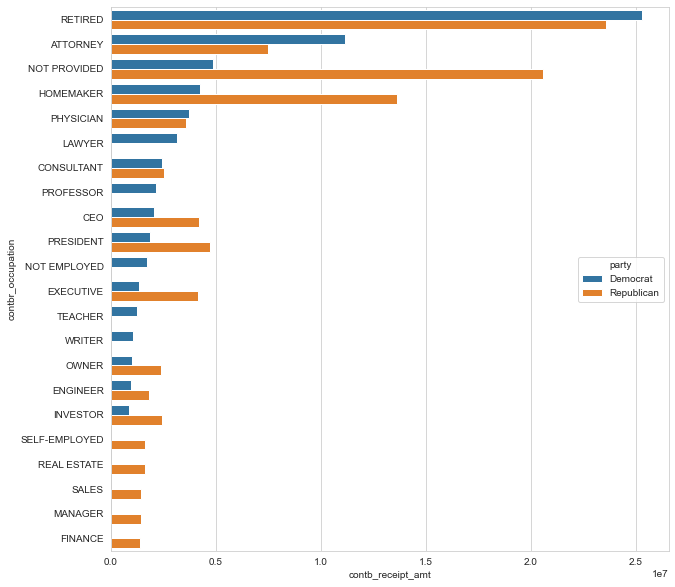

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt

figure = plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.barplot(x=amt, y=occ, hue=party, data=top_amounts_party)

In [17]:
top_amounts_party

,party,contbr_occupation,contb_receipt_amt
0,Democrat,RETIRED,25305116.38
1,Democrat,ATTORNEY,11141982.97
2,Democrat,NOT PROVIDED,4866973.96
3,Democrat,HOMEMAKER,4248875.80
4,Democrat,PHYSICIAN,3735124.94
5,Democrat,LAWYER,3160478.87
6,Democrat,CONSULTANT,2459912.71
7,Democrat,PROFESSOR,2165071.08
8,Democrat,CEO,2074974.79
9,Democrat,PRESIDENT,1878509.95


In [18]:
by_occ = topcands.pivot_table(amt, index=occ, columns=party, aggfunc="sum")
over_2m = by_occ[by_occ.sum(axis="columns") > 2e6]
over_2m

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,5364718.82
CEO,2074974.79,2324297.03
CONSULTANT,2459912.71,1424894.01
EXECUTIVE,1355161.05,2300947.03
HOMEMAKER,4248875.80,8147446.22
INVESTOR,884133.00,1537595.12
LAWYER,3160478.87,7705.20
NOT PROVIDED,4866973.96,11396894.84
PHYSICIAN,3735124.94,1368023.96


In [19]:
by_occ = data.pivot_table(amt, index=occ, columns=party, aggfunc="sum")
over_2m = by_occ[by_occ.sum(axis="columns") > 2e6]
over_2m

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


# Bucketing Donation Amounts

In [ ]:

def get_top_amounts_buckets(df, group_keys, amount_key, n=10):
    grouped = df.groupby(group_keys)
    grouped_count = grouped.apply("count")
    def sort_amounts(group):
        return group.sort_values(amount_key, ascending=False).iloc[:n]

    grouped_sum = grouped_sum.reset_index()
    top_amounts = grouped_sum.groupby(group_keys[0], as_index=False).apply(sort_amounts)
    return top_amounts.reset_index(drop=True)

In [36]:

cand = "cand_nm"
occ = "contbr_occupation"
empl = "contbr_employer"
amt = "contb_receipt_amt"
amt_bucket = "amt_bin"
party = "party"
topcands.groupby(["cand_nm", "amt_bin"]).size().unstack(level=0)

cand_nm,"Obama, Barack","Romney, Mitt"
amt_bin,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [73]:

contb_by_bucket = topcands.groupby(["cand_nm", "amt_bin"])["contb_receipt_amt"]\
.apply("sum").unstack(level=0)

In [74]:
contb_by_bucket

cand_nm,"Obama, Barack","Romney, Mitt"
amt_bin,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


In [75]:
cont_percents = contb_by_bucket/ contb_by_bucket.sum(axis="index") *100

In [76]:
contb_by_bucket

cand_nm,"Obama, Barack","Romney, Mitt"
amt_bin,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


In [77]:
contb_by_bucket.sum(axis="index")

cand_nm
Obama, Barack    1.358774e+08
Romney, Mitt     8.833591e+07
dtype: float64

In [78]:
20288981.41/1.358774e+08	

0.14931829288755893

<AxesSubplot:ylabel='amt_bin'>

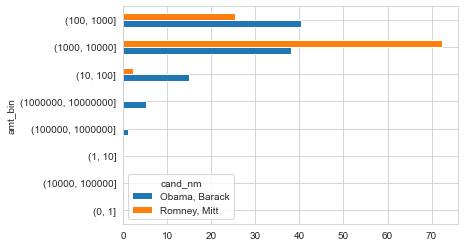

In [71]:
cont_percents.sort_values("Obama, Barack").plot(kind="barh")

In [68]:
cont_percents

cand_nm,"Obama, Barack","Romney, Mitt"
amt_bin,,
"(0, 1]",0.000234,0.000087
"(1, 10]",0.248215,0.033757
"(10, 100]",14.931826,2.250256
"(100, 1000]",40.329386,25.316298
"(1000, 10000]",38.088523,72.385225
"(10000, 100000]",0.043495,0.014377
"(100000, 1000000]",1.097079,0.000000
"(1000000, 10000000]",5.261242,0.000000


# Donation by State

In [95]:
state_grouped = topcands.groupby(["cand_nm", "contbr_st"])
state_amt = state_grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)

In [96]:
state_amt = state_amt[state_amt.sum(axis="columns") > 1e5] # greater than 1e5 contribution states

In [97]:
state_amt = state_amt.div(state_amt.sum(axis="columns"), axis="index")

In [100]:
state_amt.sort_values("Obama, Barack", ascending=False)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
VT,0.946983,0.053017
ME,0.908825,0.091175
PR,0.881192,0.118808
HI,0.876774,0.123226
MN,0.855913,0.144087
NM,0.843590,0.156410
IL,0.819226,0.180774
DC,0.810113,0.189887
WI,0.806982,0.193018
